In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv('DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [51]:
def separate_data_types(df):
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<25:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=separate_data_types(df)

from tabulate import tabulate
print(tabulate({"categorical":categorical,
                 "continuous":continuous},
                 headers=["categorical", "continuous"]))


categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Months_on_book
Income_Category           Credit_Limit
Card_Category             Total_Revolving_Bal
Region                    Avg_Open_To_Buy
Total_Relationship_Count  Total_Trans_Amt
Months_Inactive_12_mon    Total_Trans_Ct
Contacts_Count_12_mon     Avg_Utilization_Ratio


In [52]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10067.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9190.058902,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.500000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4557.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11127.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


## Identifying nulls 

In [53]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

## Identifying and removing outliers

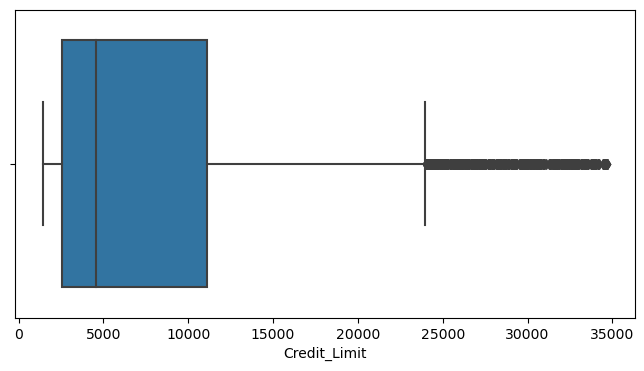

In [54]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.Credit_Limit);

In [55]:
q1=df['Credit_Limit'].describe()['25%']
q3=df['Credit_Limit'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['Credit_Limit']=np.where(df['Credit_Limit']>upper_bound, upper_bound, df['Credit_Limit'])

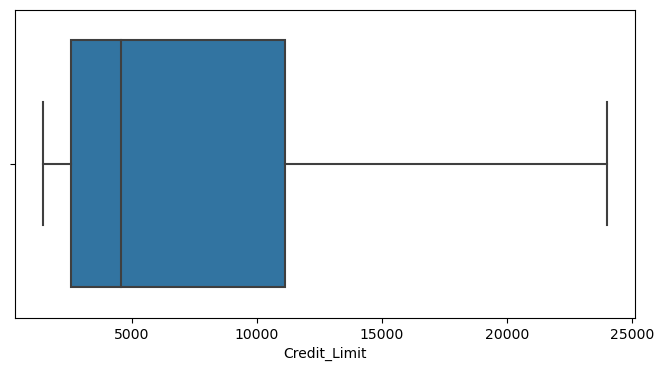

In [56]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.Credit_Limit);

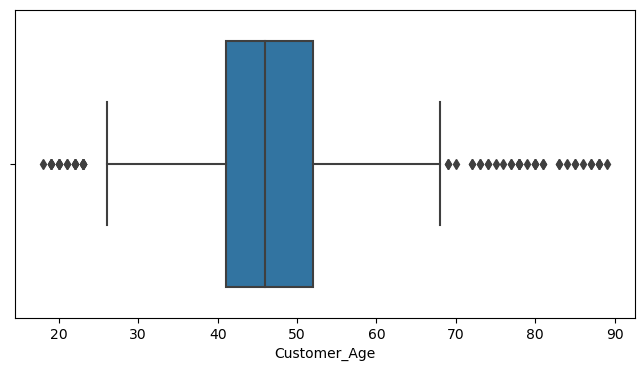

In [57]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.Customer_Age);

In [58]:
q1=df['Customer_Age'].describe()['25%']
q3=df['Customer_Age'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
df['Customer_Age']=np.where(df['Customer_Age']>upper_bound, upper_bound, df['Customer_Age'])
df['Customer_Age']=np.where(df['Customer_Age']<lower_bound, lower_bound, df['Customer_Age'])

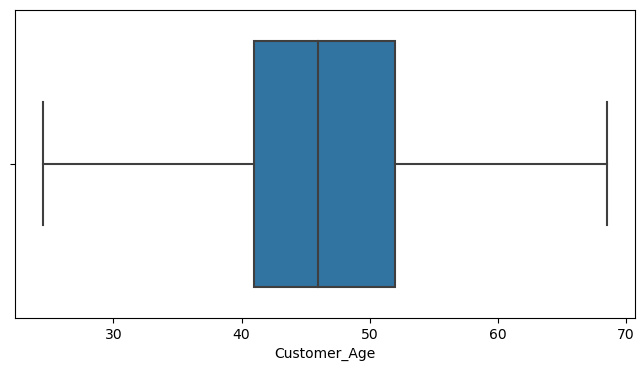

In [59]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.Customer_Age);

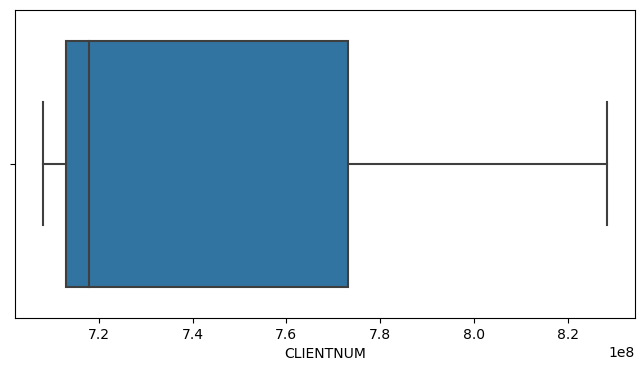

In [60]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.CLIENTNUM);

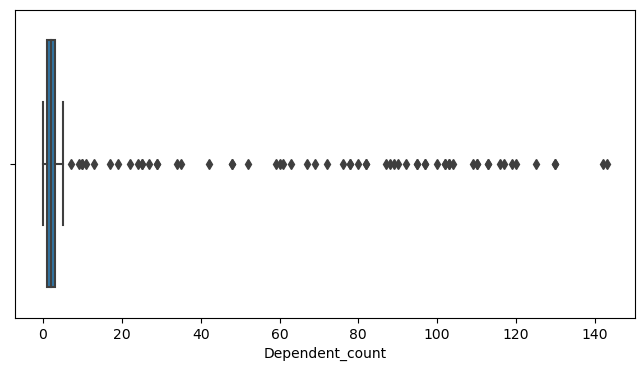

In [61]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.Dependent_count);

In [62]:
q1=df['Dependent_count'].describe()['25%']
q3=df['Dependent_count'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['Dependent_count']=np.where(df['Dependent_count']>upper_bound, upper_bound, df['Dependent_count'])

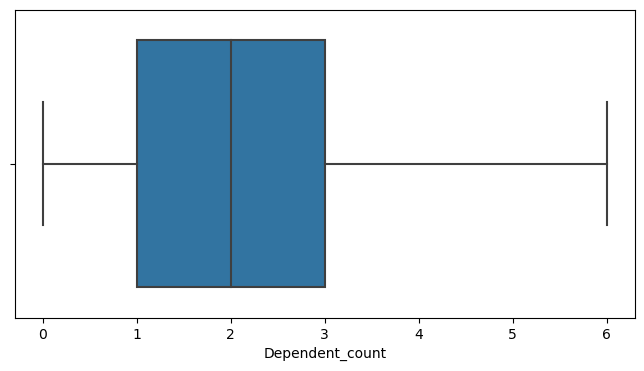

In [63]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Dependent_count);

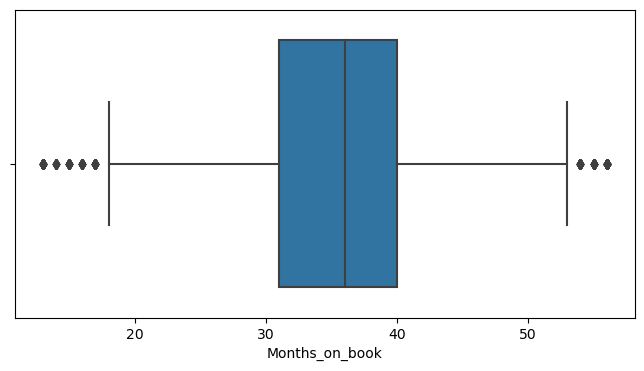

In [64]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Months_on_book);

In [65]:
q1=df['Months_on_book'].describe()['25%']
q3=df['Months_on_book'].describe()['75%']
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['Months_on_book']=np.where(df['Months_on_book']>upper_bound, upper_bound, df['Months_on_book'])
df['Months_on_book']=np.where(df['Months_on_book']<lower_bound, lower_bound, df['Months_on_book'])

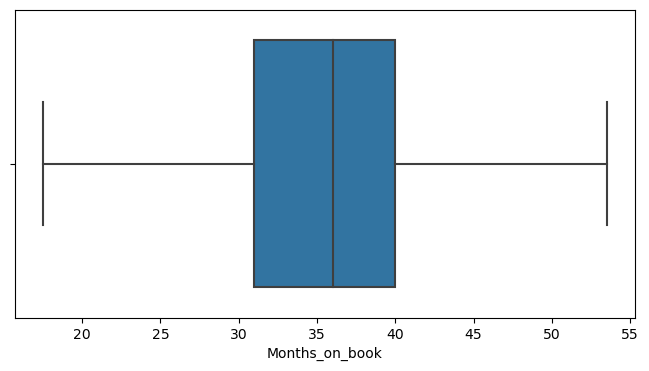

In [66]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Months_on_book);

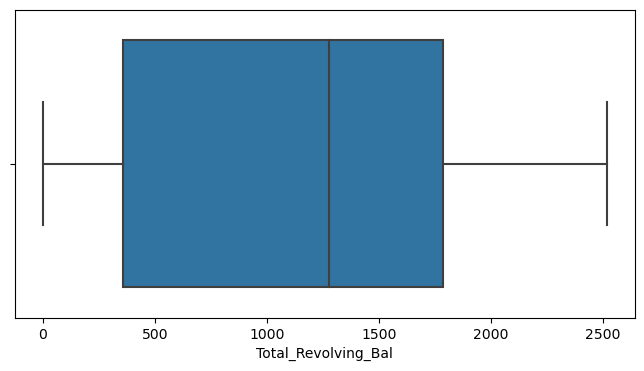

In [67]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Total_Revolving_Bal);

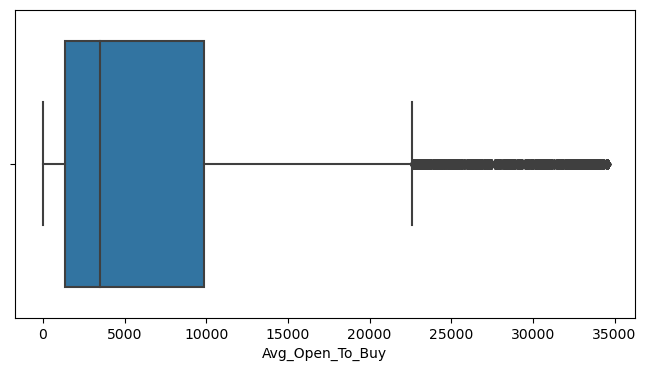

In [68]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Avg_Open_To_Buy);

In [69]:
q1=df['Avg_Open_To_Buy'].describe()['25%']
q3=df['Avg_Open_To_Buy'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['Avg_Open_To_Buy']=np.where(df['Avg_Open_To_Buy']>upper_bound, upper_bound, df['Avg_Open_To_Buy'])

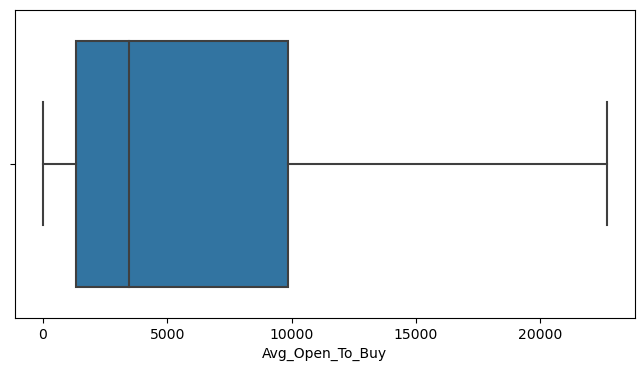

In [70]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Avg_Open_To_Buy);

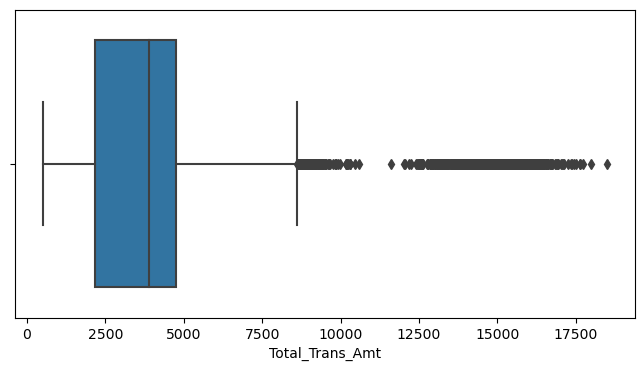

In [71]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Total_Trans_Amt);

In [72]:
q1=df['Total_Trans_Amt'].describe()['25%']
q3=df['Total_Trans_Amt'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['Total_Trans_Amt']=np.where(df['Total_Trans_Amt']>upper_bound, upper_bound, df['Total_Trans_Amt'])

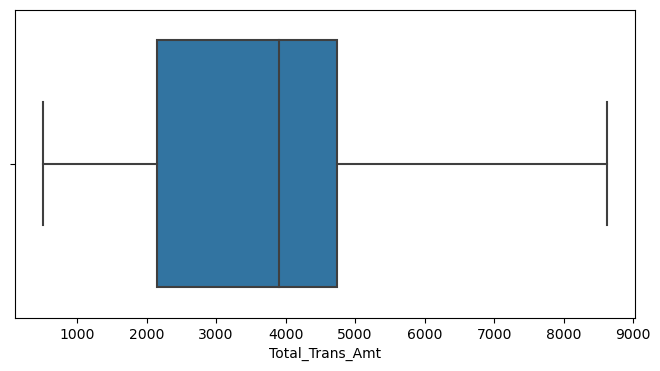

In [73]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Total_Trans_Amt);

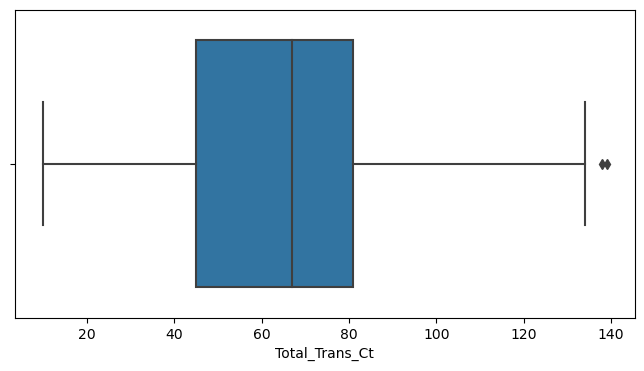

In [74]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Total_Trans_Ct);

In [75]:
q1=df['Total_Trans_Ct'].describe()['25%']
q3=df['Total_Trans_Ct'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['Total_Trans_Ct']=np.where(df['Total_Trans_Ct']>upper_bound, upper_bound, df['Total_Trans_Ct'])

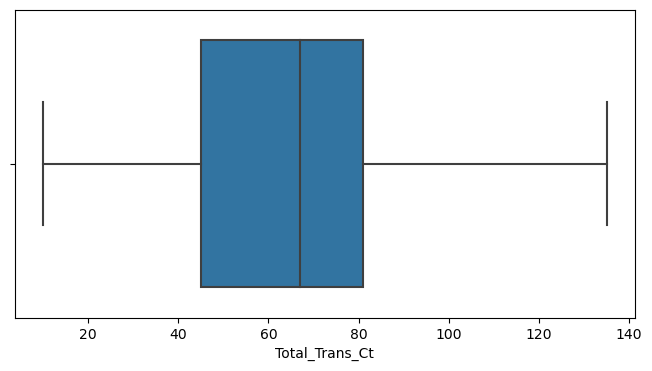

In [76]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Total_Trans_Ct);

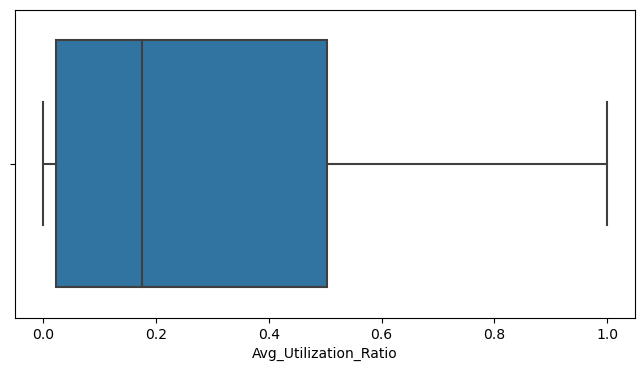

In [77]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Avg_Utilization_Ratio);

## Replacing null values.

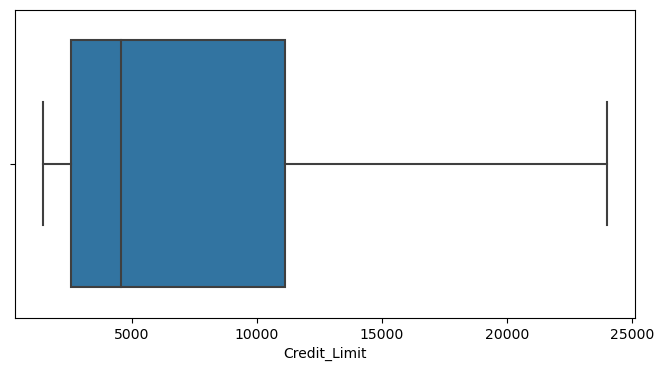

In [78]:
plt.subplots(figsize=(8,4))
sns.boxplot(df.Credit_Limit);

In [79]:
df.Credit_Limit.isnull().sum()   

60

In [80]:
df.Credit_Limit.value_counts()

23985.5    986
1438.3     502
15987.0     18
9959.0      18
23981.0     12
          ... 
3340.0       1
10541.0      1
14521.0      1
13602.0      1
10388.0      1
Name: Credit_Limit, Length: 5714, dtype: int64

In [83]:
df['Credit_Limit']=df['Credit_Limit'].fillna(df['Credit_Limit'].mode()[0])

In [84]:
df.Credit_Limit.isnull().sum()   

0

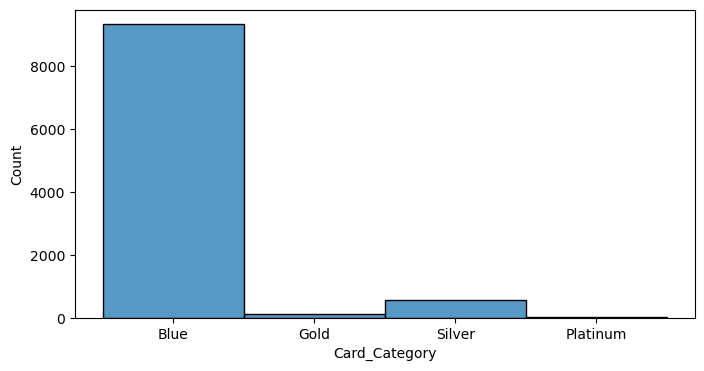

In [81]:
fig,ax=plt.subplots(figsize=(8,4))
sns.histplot(df.Card_Category);

In [86]:
df.Card_Category.isnull().sum()

132

In [82]:
df.Card_Category.value_counts()

Blue        9315
Silver       544
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [87]:
df['Card_Category']=df['Card_Category'].fillna(df['Card_Category'].mode()[0])

In [88]:
df.Card_Category.isnull().sum()

0

In [89]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

## Importing dataframe to a csv file

In [90]:
df.to_csv('tableau_project_file.csv')